<a href="https://colab.research.google.com/github/SibusisoTL/healthcare_startup_hospital_visits/blob/main/hospitalvisits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# LOAD DATA ONCE
#@st.cache_resource
def load_data():
    path = "Expanded_Patient_Readmission_Data.csv"
    if not os.path.isfile(path):
        path = f"https://github.com/SibusisoTL/healthcare_startup_hospital_visits/raw/main/{path}"

    data = pd.read_csv(
        path
    )

    return data

##1. Data Preprocessing and Cleanup



In [4]:
import pandas as pd
path = "Expanded_Patient_Readmission_Data.csv"
url = f"https://github.com/SibusisoTL/healthcare_startup_hospital_visits/raw/main/{path}"
df = pd.read_csv(url)


df.head(5)

,Patient ID,Age,Gender,Admission Type,Length of Stay,Number of Diagnoses,Blood Pressure,Blood Sugar Levels,Previous Admissions,Readmission
0,1,62,Female,Elective,4,5,110,130,1,No
1,2,65,Male,Emergency,19,2,157,81,4,No
2,3,82,Female,Emergency,18,4,74,84,0,No
3,4,85,Male,Emergency,2,4,106,85,4,No
4,5,85,Female,Elective,19,3,80,119,3,No


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Admission Type', 'Length of Stay',
       'Number of Diagnoses', 'Blood Pressure', 'Blood Sugar Levels',
       'Previous Admissions', 'Readmission'],
      dtype='object')

In [6]:

df = df.rename(columns={
    'Patient ID': 'patient_id',
    'Age': 'age',
    'Gender': 'gender',
    'Admission Type' : 'admission_type',
    'Length of Stay': 'length_of_stay',
    'Number of Diagnoses': 'number_of_diagnoses',
    'Blood Pressure': 'blood_pressure',
    'Blood Sugar Levels': 'blood_sugar_levels',
    'Previous Admissions': 'previous_admissions',
    'Readmission': 'readmission'

})

In [29]:
df.head()

,patient_id,age,age_category,gender,admission_type,length_of_stay,number_of_diagnoses,blood_pressure,blood_sugar_levels,previous_admissions,readmission
0,1,62,older_adults,Female,Elective,4,5,110,130,1,No
1,2,65,older_adults,Male,Emergency,19,2,157,81,4,No
2,3,82,elderly,Female,Emergency,18,4,74,84,0,No
3,4,85,elderly,Male,Emergency,2,4,106,85,4,No
4,5,85,elderly,Female,Elective,19,3,80,119,3,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           3000 non-null   int64 
 1   age                  3000 non-null   int64 
 2   gender               3000 non-null   object
 3   admission_type       3000 non-null   object
 4   length_of_stay       3000 non-null   int64 
 5   number_of_diagnoses  3000 non-null   int64 
 6   blood_pressure       3000 non-null   int64 
 7   blood_sugar_levels   3000 non-null   int64 
 8   previous_admissions  3000 non-null   int64 
 9   readmission          3000 non-null   object
dtypes: int64(7), object(3)
memory usage: 234.5+ KB


In [9]:
def categorize_age(age):
    if age <= 18:
        return 'childhood'
    elif 19 <= age <= 35:
        return 'young_adults' #(peak health, less chronic illness)
    elif 36 <= age <= 50:
        return 'mid-life' #(onset of chronic conditions)
    elif 51 <= age <= 70:
        return 'older_adults' #(increased health risks)
    else:
      return 'elderly' #(high risk of chronic conditions)

# Apply the categorization function to the 'Age' column
df['age_category'] = df['age'].apply(categorize_age)

# Insert 'Age Category' column at column index 2 (3rd position)
df.insert(2, 'age_category', df.pop('age_category'))


In [20]:
df.head()

,patient_id,age,age_category,gender,admission_type,length_of_stay,number_of_diagnoses,blood_pressure,blood_sugar_levels,previous_admissions,readmission
0,1,62,older_adults,Female,Elective,4,5,110,130,1,No
1,2,65,older_adults,Male,Emergency,19,2,157,81,4,No
2,3,82,elderly,Female,Emergency,18,4,74,84,0,No
3,4,85,elderly,Male,Emergency,2,4,106,85,4,No
4,5,85,elderly,Female,Elective,19,3,80,119,3,No


##2. Exploratory Data Analysis and Insights

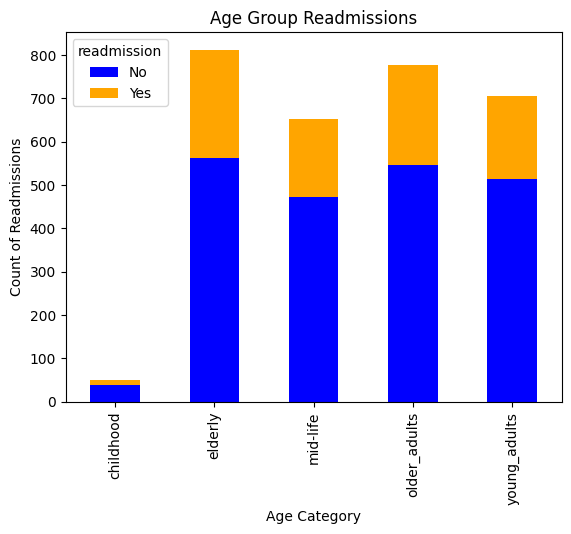

In [11]:
# Group by 'age_category' and 'readmission' to count occurrences
age_readmission_counts = df.groupby(['age_category', 'readmission']).size().unstack()

# Plotting the bar chart
age_readmission_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('Age Group Readmissions')
plt.xlabel('Age Category')
plt.ylabel('Count of Readmissions')

# Show the plot
plt.show()

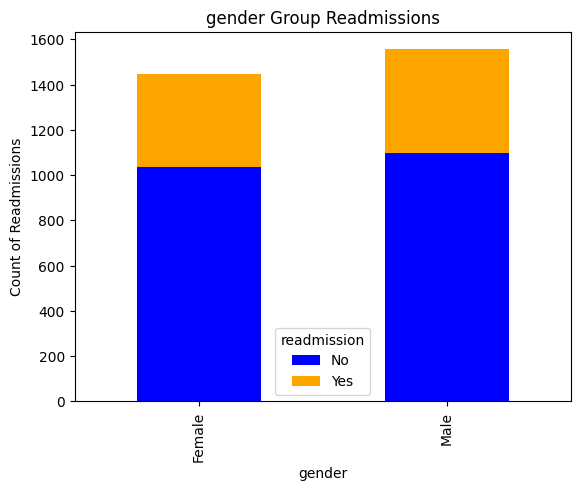

In [12]:
# Group by 'Gender_category' and 'readmission' to count occurrences
gender_readmission_counts = df.groupby(['gender', 'readmission']).size().unstack()

# Plotting the bar chart
gender_readmission_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add titles and labels
plt.title('gender Group Readmissions')
plt.xlabel('gender')
plt.ylabel('Count of Readmissions')

# Show the plot
plt.show()

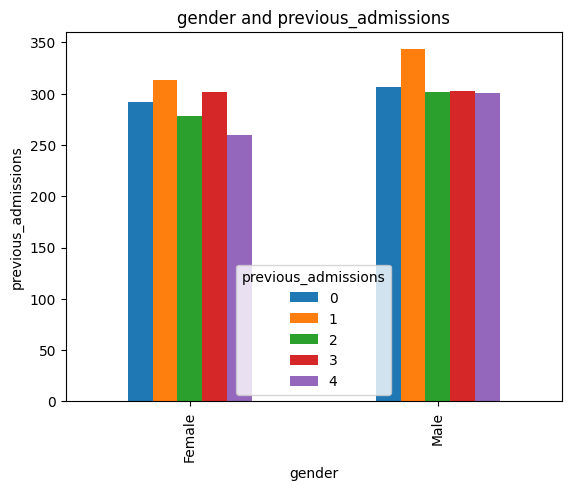

In [13]:
# Group by 'Gender_category' and 'previous_admissions' to count occurrences
gender_readmission_counts = df.groupby(['gender', 'previous_admissions']).size().unstack()

# Plotting the bar chart
gender_readmission_counts.plot(kind='bar')

# Add titles and labels
plt.title('gender and previous_admissions')
plt.xlabel('gender')
plt.ylabel('previous_admissions')

# Show the plot
plt.show()

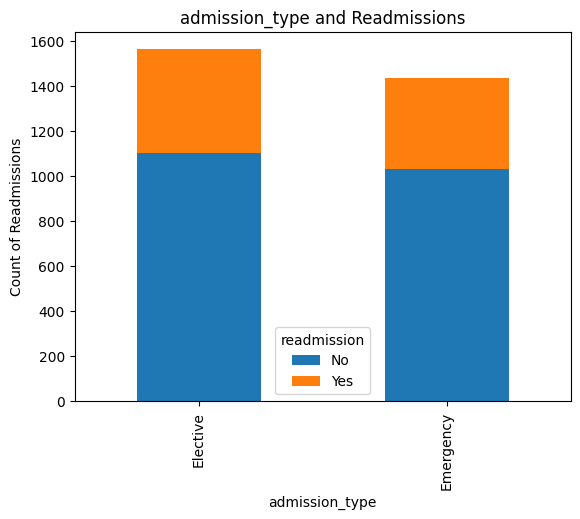

In [14]:
# Group by 'aadmission_type' and 'readmission' to count occurrences
admission_type_readmission_counts = df.groupby(['admission_type', 'readmission']).size().unstack()

# Plotting the bar chart
admission_type_readmission_counts.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('admission_type and Readmissions')
plt.xlabel('admission_type')
plt.ylabel('Count of Readmissions')

# Show the plot
plt.show()


<ipython-input-27-3ef8d2d28fe5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_23, x='number_of_diagnoses', y='age_category', inner='stick', palette='Dark2')


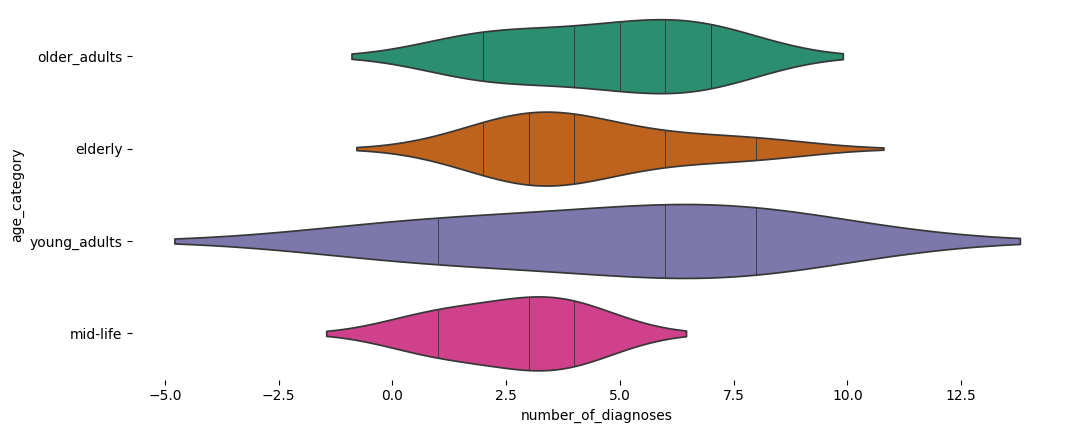

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['age_category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='number_of_diagnoses', y='age_category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)